In [1]:
import ee
from ipygee import *
import eeconvert
import pandas as pd
import geopandas as gpd
import numpy as np
ee.Initialize()

In [2]:
import os,glob
g = os.getcwd()
g
path = 'D:\\repos\\CIAT\\IDB_PROJECT'
os.chdir(path)

In [3]:
# import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rc={"font.weight":"bold",'figure.figsize':(12, 6),'axes.labelsize': 28,
    'font.size': 28,'axes.titlesize': 28,'legend.fontsize': 18, 'axes.titlesize': 28,
    "lines.linewidth": 2.5,'font.sans-serif': "Times New Roman"}
sns.set(style="white", rc=rc,font_scale = 1.8)
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix

In [4]:
Points = gpd.read_file("Data_IDB/new/Zona_influencia_DR.shp")
# print(Points.crs)
Points = Points.to_crs("EPSG:4326")
ID = str(Points["cuest_id_b"]) + str(Points["parcela"])
str1 = [str(int) for int in Points["cuest_id_b"]] 
str2 = [str(int) for int in Points["parcela"]]
Points["ID"] = [s1 + s2 for s1, s2 in zip(str1, str2)]
ok = Points[Points['corregido2'].str.contains("ok")]
print(len(ok))
Points = ok[["ID","patca",'geometry']]
# Points.to_csv("test.csv")
Points = eeconvert.gdfToFc(Points)
Points

377


In [5]:
path = 7  
row = 47;
date = ee.Date.fromYMD(2013,7,22);

ic = l8.filter(ee.Filter.eq('WRS_PATH', path)).filter(ee.Filter.eq('WRS_ROW', row))

y = range(2011,2020)
clud = 35
df = pd.DataFrame()
for i in y:
    start = ee.Date.fromYMD(i,1,1)
    end = ee.Date.fromYMD(i,12,31)
    #         dataset5_T1 = ee.ImageCollection("LANDSAT/LT05/C01/T1_SR").filterDate(start,end).filterBounds(ROI).size()####T1 is Data that meets geometric and radiometric quality requirements
    #         "LANDSAT/LT05/C01/T1_SR" - 'LANDSAT/LT05/C01/T1_TOA'
    dataset7_T1 = ee.ImageCollection('LANDSAT/LE07/C01/T1_TOA').filterDate(start,end).filterBounds(Points).size()####T1 is Data that meets geometric and radiometric quality requirements
    #         "LANDSAT/LE07/C01/T1_SR" - 'LANDSAT/LE07/C01/T1_TOA'
    # dataset7_T2 = ee.ImageCollection('LANDSAT/LE07/C01/T2_SR').filterDate(start,end).filterBounds(ROI).filterMetadata("CLOUD_COVER", "less_than", clud).size()##T2 is Data that doesn't meet the Tier 1 requirements
    dataset8_T1 = ee.ImageCollection("LANDSAT/LC08/C01/T1_TOA").filterDate(start,end).filterBounds(Points).size()
    #         "LANDSAT/LC08/C01/T1_SR" - "LANDSAT/LC08/C01/T1_TOA"
    # dataset8_T2 = ee.ImageCollection("LANDSAT/LC08/C01/T2_SR").filterDate(start,end).filterBounds(ROI).filterMetadata("CLOUD_COVER", "less_than", clud).size()

    a = pd.DataFrame({"ano" : [i],
#                       "L5" : [dataset5_T1.getInfo()],
                      "L7" : [dataset7_T1.getInfo()],
                      "L8" : [dataset8_T1.getInfo()]})
    df = df.append(a)

In [6]:
alldf_SR = df
alldf_SR

,ano,L7,L8
0,2011,66,0
0,2012,69,0
0,2013,64,58
0,2014,2,103
0,2015,0,103
0,2016,9,99
0,2017,0,95
0,2018,0,107
0,2019,0,107


In [7]:
# TOA = alldf_TOA_c.pivot_table(values=["L5","L7","L8"], index="ano", aggfunc='sum')
SR = alldf_SR.pivot_table(values=["L7","L8"], index="ano", aggfunc='sum')
SR
# .plot.bar(stacked=True)
# locs, labels = plt.xticks()
# plt.legend(loc='upper center', ncol=7, frameon=True, shadow=False, prop={'size':8})
# plt.setp(labels, rotation=0, rotation_mode="anchor", ha="center")
# plt.show()

,L7,L8
ano,,
2011,66,0
2012,69,0
2013,64,58
2014,2,103
2015,0,103
2016,9,99
2017,0,95
2018,0,107
2019,0,107


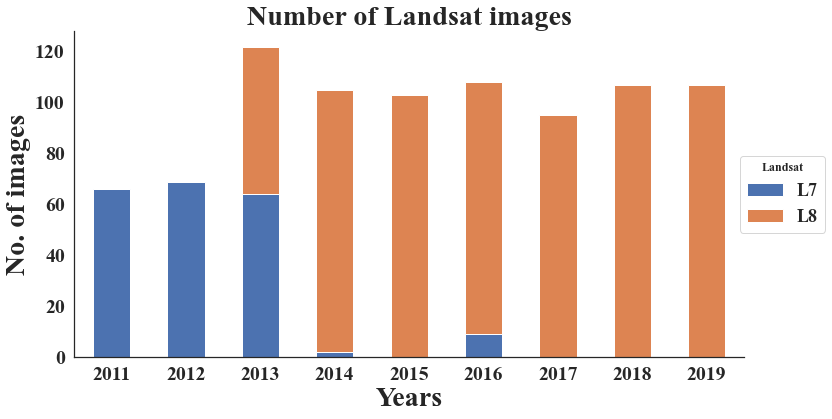

In [14]:
p = SR.plot.bar(stacked=True)
p.set(xlabel='Years', ylabel='No. of images',title="Number of Landsat images")
locs, labels = plt.xticks()
# plt.legend(loc='upper center', ncol=7, frameon=True, shadow=False, prop={'size':8})
p.legend(title='Landsat',loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1)
# p.legend.set_title("Landsat")
sns.despine()
plt.setp(labels, rotation=0, rotation_mode="anchor", ha="center")
plt.show()

In [ ]:
SR['año'] = SR.index
SR_melt = pd.melt(SR,"año")
SR_melt

t = sum(SR_melt.value)
p = sum(SR_melt.value[SR_melt.variable=="L7"])
# SR_melt.año<2013 - SR_melt.variable=="L7"
po = (p*100)/t
po
t
# g = sns.catplot(x="año", y="value", hue="variable", data=SR_melt,
#                 height=6, kind="bar", palette="muted")

# SR_melt=SR_melt[SR_melt.variable != "L5"]
# np.mean(SR_melt.value)
